<font size=2;>
<p style="text-align: right;">
Lab Solution
</p>
</font>

# Multinomial Classification

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Data & New Observation

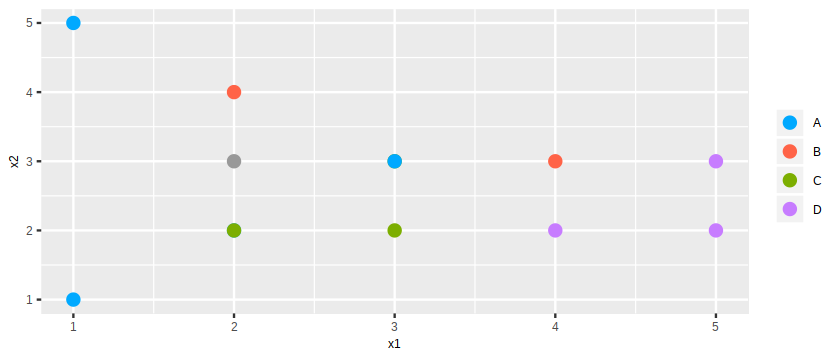

In [2]:
data = data.frame(x1=c(3,1,2,3,2,1,2,3,4,4,5,5),
                  x2=c(2,5,4,3,2,1,2,3,3,2,3,2),
                  class=c("C","A","B","C","A","A","C","A","B","D","D","D"))
new = data.frame(x1=2, x2=3)

ggplot(data) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR)

## Problem 1

Build a multinomial naive Bayes model to predict class given x1 and x2.

Show the model parameters (note: conditional probabilities/likelihoods are expressed as Gaussian means and standard deviations).<br>
Show the probabilities resulting from the model applied to the data.<br>
Show the probabilities resulting from the model applied to `new`.
Predict `new`'s class by maximum probability pick.   

You may want to use these function(s):
* naivebayes()
* predict()
* pick()

In [3]:
# Show the model parameters
model = naiveBayes(class ~ x1+x2, data)
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        A         B         C         D 
0.3333333 0.1666667 0.2500000 0.2500000 

Conditional probabilities:
   x1
Y       [,1]      [,2]
  A 1.750000 0.9574271
  B 3.000000 1.4142136
  C 2.666667 0.5773503
  D 4.666667 0.5773503

   x2
Y       [,1]      [,2]
  A 2.750000 1.7078251
  B 3.500000 0.7071068
  C 2.333333 0.5773503
  D 2.333333 0.5773503


In [4]:
# Show the probabilities resulting from the model applied to the data
prob.data = predict(model, data, type="raw")
prob.data

A,B,C,D
0.122629812,0.027287788,0.834792639006,0.0152897605230135712
0.906930129,0.093065968,0.000003903244,0.0000000000004392522
0.584701251,0.392139218,0.023158479250,0.0000010513933313669
0.157027291,0.236979696,0.595093495955,0.0108995175769394659
0.345022701,0.026382411,0.628566351826,0.0000285368682239497
0.989668349,0.001320164,0.009011485841,0.0000000010141091336
0.345022701,0.026382411,0.628566351826,0.0000285368682239497
0.157027291,0.236979696,0.595093495955,0.0108995175769394659
0.037682785,0.298822307,0.079090531842,0.5844043766715687482
0.029588505,0.034596273,0.111551908946,0.8242633131472791863


In [5]:
# Show the probabilities resulting from the model applied to new
prob.new = predict(model, new, type="raw")
prob.new

A,B,C,D
0.3948105,0.2047478,0.4004236,0.0000181792


In [6]:
# Predict new's class by maximum probability pick
new.predicted_class = pick(prob.new, max)
new.predicted_class

[1] C
Levels: A B C D

## Problem 2

Build a multinomial neural network model to predict class given x1 and x2.

Show the dummified version of the data.<br>
Show the model weights.<br>
Show the probabilities resulting from the model applied to the data.
Show the probabilities resulting from the model applied to `new`.
Predict `new`'s class by maximum probability pick.   

You may want to use these function(s):
* dummify()
* set.seed()
* neuralnet()
* compute()
* pick()

Use `neuralnet(..., ..., hidden=4, act.fct="logistic", algorithm="rprop+", rep=1, linear.output=FALSE)` to build the model - preceed with `set.seed(0)`.<br>
Use `model$weights` to get the model weights.<br>
Use `compute(..., ..., rep=1)$net.result` to get the probabilities calculated by the model.

In [7]:
# Show the dummified version of the data
dummify.data = dummify(data)
dummify.data

x1,x2,classA,classB,classC,classD
3,2,0,0,1,0
1,5,1,0,0,0
2,4,0,1,0,0
3,3,0,0,1,0
2,2,1,0,0,0
1,1,1,0,0,0
2,2,0,0,1,0
3,3,1,0,0,0
4,3,0,1,0,0
4,2,0,0,0,1


In [8]:
# Show the model weights
set.seed(0)
model = neuralnet(classA+classB+classC+classD~x1+x2, dummify.data, hidden=4, act.fct="logistic", 
                  algorithm="rprop+", rep=1, linear.output=FALSE)
model.weights = model$weights
model.weights

2.254744,-1.374785,5.994381,4.9450221
-1.650311,1.981888,-3.958157,-0.5110347
2.460932,-3.236536,-0.374824,-1.2948784
-2.5762059,3.587781,-5.8629443,7.644005
0.8821328,22.487792,0.1441206,-14.525255
-47.4210797,-48.167602,-14.6422514,109.745280
7.0460104,-87.368239,-93.1294598,-112.304107
3.0062440,-74.922603,15.2388049,-45.254427


In [9]:
# Show the probabilities resulting from the model applied to the data
prob.data = compute(model, data[,c("x1", "x2")], rep=1)$net.result
prob.data = data.frame(A=prob.data[,1], B=prob.data[,2], C=prob.data[,3], D=prob.data[,4])
prob.data

A,B,C,D
2.899090e-03,1.003877e-15,9.442328e-01,1.253309e-10
9.212635e-01,1.190100e-13,2.625905e-24,2.466435e-32
3.085933e-01,9.987781e-01,5.019562e-03,1.306947e-09
3.062029e-01,3.703318e-02,4.903305e-01,5.705492e-11
5.416754e-01,3.167715e-18,5.049733e-01,2.469246e-21
9.797623e-01,2.546846e-54,2.738987e-31,4.687097e-60
5.416754e-01,3.167715e-18,5.049733e-01,2.469246e-21
3.062029e-01,3.703318e-02,4.903305e-01,5.705492e-11
5.457457e-02,9.362834e-01,1.017834e-01,7.881469e-07
1.487703e-11,1.418135e-22,1.004567e-02,1.000000e+00


In [10]:
# Show the probabilities resulting from the model applied to new
prob.new = compute(model, new, rep=1)$net.result
prob.new = data.frame(A=prob.new[,1], B=prob.new[,2], C=prob.new[,3], D=prob.new[,4])
prob.new

A,B,C,D
0.5293873,0.00000009723511,0.1005532,6.808491e-16


In [11]:
# Predict new's class by maximum probability pick
new.predicted_class = pick(prob.new, max)
new.predicted_class

[1] A
Levels: A B C D

## Problem 3

Build a multinomial support vector machine model to predict class given x1 and x2, using the **one vs. many** approach.

Show the one vs. many datasets.<br>
Show the parameters for each submodel.<br>
Show the probabilities resulting from submodels applied to `new`.<br>
Predict `new`'s class by maximum probability pick. 

You may want to use these function(s):
* factor()
* set.seed()
* svm()
* as.data.frame()
* attr()
* predict()
* pick()

Use `svm(..., ..., type="C-classification", kernel="polynomial", degree=3, coef0=0, gamma=0.25, cost=10, scale=FALSE, probability=TRUE)` to build the submodels - preceed each use of `svm` with `set.seed(0)`.<br>
Use `as.data.frame(attr(predict(..., ..., probability=TRUE), "probabilities"))` to get the probabilities calculated by the models. 

In [12]:
# Show the one vs. many datasets
data.Ao = data[, c("x1","x2")]
data.Ao$class = NA
data.Ao$class[data$class=="A"] = "A"
data.Ao$class[data$class!="A"] = "other"
data.Ao$class = factor(data.Ao$class)
data.Ao

x1,x2,class
3,2,other
1,5,A
2,4,other
3,3,other
2,2,A
1,1,A
2,2,other
3,3,A
4,3,other
4,2,other


In [13]:
# Show the one vs. many datasets
data.Bo = data[, c("x1","x2")]
data.Bo$class = NA
data.Bo$class[data$class=="B"] = "B"
data.Bo$class[data$class!="B"] = "other"
data.Bo$class = factor(data.Bo$class)
data.Bo

x1,x2,class
3,2,other
1,5,other
2,4,B
3,3,other
2,2,other
1,1,other
2,2,other
3,3,other
4,3,B
4,2,other


In [14]:
# Show the one vs. many datasets
data.Co = data[, c("x1","x2")]
data.Co$class = NA
data.Co$class[data$class=="C"] = "C"
data.Co$class[data$class!="C"] = "other"
data.Co$class = factor(data.Co$class)
data.Co

x1,x2,class
3,2,C
1,5,other
2,4,other
3,3,C
2,2,other
1,1,other
2,2,C
3,3,other
4,3,other
4,2,other


In [15]:
# Show the one vs. many datasets
data.Do = data[, c("x1","x2")]
data.Do$class = NA
data.Do$class[data$class=="D"] = "D"
data.Do$class[data$class!="D"] = "other"
data.Do$class = factor(data.Do$class)
data.Do

x1,x2,class
3,2,other
1,5,other
2,4,other
3,3,other
2,2,other
1,1,other
2,2,other
3,3,other
4,3,other
4,2,D


In [16]:
# Show the parameters for each submodel
set.seed(0)
model.Ao = svm(class ~ x1+x2, data.Ao, type="C-classification", kernel="polynomial", degree=3, coef0=0, gamma=0.25, 
               cost=10, scale=FALSE, probability=TRUE)
model.Ao

set.seed(0)
model.Bo = svm(class ~ x1+x2, data.Bo, type="C-classification", kernel="polynomial", degree=3, coef0=0, gamma=0.25, 
               cost=10, scale=FALSE, probability=TRUE)
model.Bo

set.seed(0)
model.Co = svm(class ~ x1+x2, data.Co, type="C-classification", kernel="polynomial", degree=3, coef0=0, gamma=0.25, 
               cost=10, scale=FALSE, probability=TRUE)
model.Co

set.seed(0)
model.Do = svm(class ~ x1+x2, data.Do, type="C-classification", kernel="polynomial", degree=3, coef0=0, gamma=0.25, 
               cost=10, scale=FALSE, probability=TRUE)
model.Do


Call:
svm(formula = class ~ x1 + x2, data = data.Ao, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  8



Call:
svm(formula = class ~ x1 + x2, data = data.Bo, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  4



Call:
svm(formula = class ~ x1 + x2, data = data.Co, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  9



Call:
svm(formula = class ~ x1 + x2, data = data.Do, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  3


In [17]:
# Show the probabilities resulting from submodels applied to new
# A's
prob.Ao = attr(predict(model.Ao, new, probability=TRUE), "probabilities")
prob.Ao


# B's
prob.Bo = attr(predict(model.Bo, new, probability=TRUE), "probabilities")
prob.Bo


# C's
prob.Co = attr(predict(model.Co, new, probability=TRUE), "probabilities")
prob.Co


# D's
prob.Do = attr(predict(model.Do, new, probability=TRUE), "probabilities")
prob.Do

other,A
0.606236,0.393764


other,B
0.8184663,0.1815337


C,other
0.2708015,0.7291985


other,D
0.8992863,0.1007137


In [18]:
# Show just the probabilities for each class
prob.new = data.frame(A=prob.Ao[, "A"], B=prob.Bo[, "B"], C=prob.Co[, "C"], D=prob.Do[, "D"])
prob.new

A,B,C,D
0.393764,0.1815337,0.2708015,0.1007137


In [19]:
# Predict new's class by maximum probability pick
new.predicted_class = pick(prob.new, max)
new.predicted_class

[1] A
Levels: A B C D

## Problem 4

Build a multinomial support vector machine model to predict class given x1 and x2, using the **one vs. one** approach.

Show the one vs. one datasets.<br>
Show the parameters for each submodel.<br>
Show the probabilities resulting from submodels applied to `new`.<br>
Predict `new`'s class by round robin competition. 

You may want to use these function(s):
* set.seed()
* svm()
* as.data.frame()
* attr()
* predict()
* round_robin()

Use `svm(..., ..., type="C-classification", kernel="polynomial", degree=3, coef0=0, gamma=0.25, cost=10, scale=FALSE, probability=TRUE)` to build the submodels - preceed each use of `svm` with `set.seed(0)`.<br>
Use `as.data.frame(attr(predict(..., ..., probability=TRUE), "probabilities"))` to get the probabilities calculated by the models. 

In [20]:
# Show the one vs. one datasets
data.AB = data[data$class %in% c("A","B"),]
data.AB

,x1,x2,class
2,1,5,A
3,2,4,B
5,2,2,A
6,1,1,A
8,3,3,A
9,4,3,B


In [21]:
# Show the one vs. one datasets
data.AC = data[data$class %in% c("A","C"),]
data.AC

,x1,x2,class
1,3,2,C
2,1,5,A
4,3,3,C
5,2,2,A
6,1,1,A
7,2,2,C
8,3,3,A


In [22]:
# Show the one vs. one datasets
data.AD = data[data$class %in% c("A","D"),]
data.AD

,x1,x2,class
2,1,5,A
5,2,2,A
6,1,1,A
8,3,3,A
10,4,2,D
11,5,3,D
12,5,2,D


In [23]:
# Show the one vs. one datasets
data.BC = data[data$class %in% c("B","C"),]
data.BC

,x1,x2,class
1,3,2,C
3,2,4,B
4,3,3,C
7,2,2,C
9,4,3,B


In [24]:
# Show the one vs. one datasets
data.BD = data[data$class %in% c("B","D"),]
data.BD

,x1,x2,class
3,2,4,B
9,4,3,B
10,4,2,D
11,5,3,D
12,5,2,D


In [25]:
# Show the one vs. one datasets
data.CD = data[data$class %in% c("C","D"),]
data.CD

,x1,x2,class
1,3,2,C
4,3,3,C
7,2,2,C
10,4,2,D
11,5,3,D
12,5,2,D


In [26]:
# Show the parameters for each submodel
# AB model
set.seed(0)
model.AB = svm(class ~ x1+x2, data.AB, type="C-classification", kernel="polynomial", degree=3, coef0=0, 
               gamma=0.25, cost=10, scale=FALSE, probability=TRUE)
model.AB

# AC model
set.seed(0)
model.AC = svm(class ~ x1+x2, data.AC, type="C-classification", kernel="polynomial", degree=3, coef0=0, 
               gamma=0.25, cost=10, scale=FALSE, probability=TRUE)
model.AC

# AD model
set.seed(0)
model.AD = svm(class ~ x1+x2, data.AD, type="C-classification", kernel="polynomial", degree=3, coef0=0, 
               gamma=0.25, cost=10, scale=FALSE, probability=TRUE)
model.AD

# BC model
set.seed(0)
model.BC = svm(class ~ x1+x2, data.BC, type="C-classification", kernel="polynomial", degree=3, coef0=0, 
               gamma=0.25, cost=10, scale=FALSE, probability=TRUE)
model.BC

# BD model
set.seed(0)
model.BD = svm(class ~ x1+x2, data.BD, type="C-classification", kernel="polynomial", degree=3, coef0=0, 
               gamma=0.25, cost=10, scale=FALSE, probability=TRUE)
model.BD

# CD model
set.seed(0)
model.CD = svm(class ~ x1+x2, data.CD, type="C-classification", kernel="polynomial", degree=3, coef0=0, 
               gamma=0.25, cost=10, scale=FALSE, probability=TRUE)
model.CD


Call:
svm(formula = class ~ x1 + x2, data = data.AB, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  4



Call:
svm(formula = class ~ x1 + x2, data = data.AC, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  6



Call:
svm(formula = class ~ x1 + x2, data = data.AD, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  2



Call:
svm(formula = class ~ x1 + x2, data = data.BC, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  3



Call:
svm(formula = class ~ x1 + x2, data = data.BD, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  3



Call:
svm(formula = class ~ x1 + x2, data = data.CD, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  3


In [27]:
# Show the probabilities resulting from submodels applied to new
prob.AB = as.data.frame(attr(predict(model.AB, new, probability=TRUE), "probabilities"))
prob.AB

prob.AC = as.data.frame(attr(predict(model.AC, new, probability=TRUE), "probabilities"))
prob.AC

prob.AD = as.data.frame(attr(predict(model.AD, new, probability=TRUE), "probabilities"))
prob.AD

prob.BC = as.data.frame(attr(predict(model.BC, new, probability=TRUE), "probabilities"))
prob.BC

prob.BD = as.data.frame(attr(predict(model.BD, new, probability=TRUE), "probabilities"))
prob.BD

prob.CD = as.data.frame(attr(predict(model.CD, new, probability=TRUE), "probabilities"))
prob.CD

A,B
0.6301846,0.3698154


C,A
0.5636292,0.4363708


A,D
0.7483942,0.2516058


C,B
0.5833977,0.4166023


B,D
0.4878066,0.5121934


C,D
0.7829222,0.2170778


In [28]:
# Predict new's class by round robin competition
winner = round_robin(prob.AB, prob.AC, prob.AD, prob.BC, prob.BD, prob.CD)
winner

[1] C
Levels: A B C D

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised April 5, 2020
</span>
</p>
</font>